In [166]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

In [149]:
cd E:/Python/Datasets/Titanic

E:\Python\Datasets\Titanic


In [150]:
data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
data = data[['Survived','Pclass','Sex','Age','SibSp','Parch']]
test_data = test_data[['Pclass','Sex','Age','SibSp','Parch']]
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [151]:
print((data.isnull().sum()))
data.dropna(inplace=True)
print((test_data.isnull().sum()))
test_data.dropna(inplace = True)

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
dtype: int64
Pclass     0
Sex        0
Age       86
SibSp      0
Parch      0
dtype: int64


In [152]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch
count,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118,0.512605,0.431373
std,0.491460,0.838250,14.526497,0.929783,0.853289
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,1.000000,20.125000,0.000000,0.000000
50%,0.000000,2.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000


In [153]:
le = preprocessing.LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
test_data['Sex'] = le.fit_transform(test_data['Sex'])
data.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch
885,0,3,0,39.0,0,5
886,0,2,1,27.0,0,0
887,1,1,0,19.0,0,0
889,1,1,1,26.0,0,0
890,0,3,1,32.0,0,0


<BarContainer object of 2 artists>

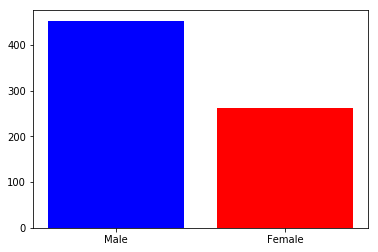

In [154]:
plt.bar((1,2),height = pd.Series(data.Sex).value_counts(),color = ['b','r'],tick_label = ['Male','Female'])
# plt.bar(1,height = pd.Series(data.Sex).value_counts()[0],color = 'b',tick_label = 'female')
# plt.bar(2,height = pd.Series(data.Sex).value_counts()[1],color = 'r',tick_label = 'male')

<BarContainer object of 3 artists>

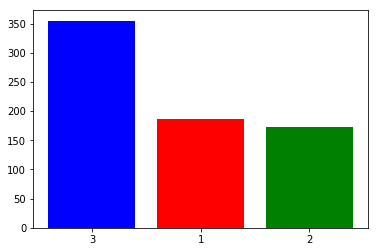

In [155]:
plt.bar((1,2,3),height = pd.Series(data.Pclass).value_counts(),color = ['b','r','g'],tick_label = ['3','1','2'])

In [165]:
knn = KNeighborsClassifier(n_neighbors=10)
x_train, x_test, y_train, y_test = train_test_split(data[['Pclass','Sex','Age','SibSp','Parch']],data['Survived'],test_size=0.33,random_state=100)
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)
acc_knn = accuracy_score(y_true = y_test, y_pred = pred_knn)*100
print("Accuracy of knn classifier: " + str(acc_knn) + " %")

Accuracy of knn classifier: 74.57627118644068 %


In [167]:
SVM = svm.SVC(C = 5)
x_train, x_test, y_train, y_test = train_test_split(data[['Pclass','Sex','Age','SibSp','Parch']],data['Survived'],test_size=0.33,random_state=100)
SVM.fit(x_train, y_train)
pred_SVM = SVM.predict(x_test)
acc_SVM = accuracy_score(y_true = y_test, y_pred = pred_SVM)*100
print("Accuracy of SVM classifier: " + str(acc_SVM) + " %")

Accuracy of SVM classifier: 79.66101694915254 %


C:\Users\Saurabh Wani\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [176]:
LR = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(data[['Pclass','Sex','Age','SibSp','Parch']],data['Survived'],test_size=0.33,random_state=100)
LR.fit(x_train, y_train)
pred_LR = LR.predict(x_test)
acc_LR = accuracy_score(y_true = y_test, y_pred = pred_LR)*100
print("Accuracy of Logistic Regression classifier: " + str(acc_LR) + " %")

Accuracy of Logistic Regression classifier: 80.50847457627118 %


C:\Users\Saurabh Wani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [121]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",0,23.0,1,0,21228,82.2667,B45,S
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",0,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",0,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,"Ostby, Miss. Helene Ragnhild",0,22.0,0,1,113509,61.9792,B36,C
28,920,1,"Brady, Mr. John Bertram",1,41.0,0,0,113054,30.5000,A21,S
34,926,1,"Mock, Mr. Philipp Edmund",1,30.0,1,0,13236,57.7500,C78,C
44,936,1,"Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)",0,45.0,1,0,11753,52.5542,D19,S
46,938,1,"Chevre, Mr. Paul Romaine",1,45.0,0,0,PC 17594,29.7000,A9,C
48,940,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",0,60.0,0,0,11813,76.2917,D15,C
50,942,1,"Smith, Mr. Lucien Philip",1,24.0,1,0,13695,60.0000,C31,S
